<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%matplotlib inline

In [2]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-10-07 20:32:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-10-07 20:32:22 (226 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [8]:
# notice: installing seaborn might takes a few minutes
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


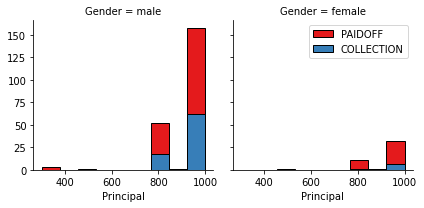

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

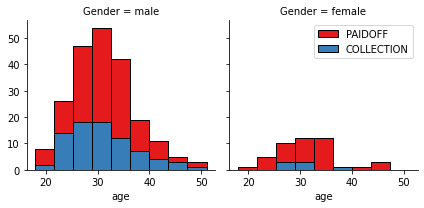

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


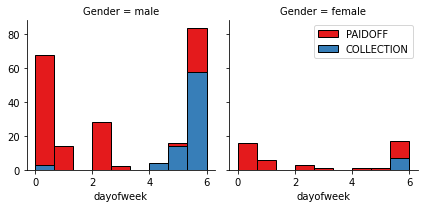

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [19]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y = df['loan_status']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# Class Imbalance and Evaluation Metric selection for hyperparameter tuning
As we are aware, the stats of our dataset are as given below-

PAIDOFF  -  260

COLLECTION   - 86

We can see there is a class imbalance present in the dataset. Hence, accuracy will not indicate the realistic performance of the models. Therefore, I have chosen to use F1-weighted metric for hyperparamter tuning using cross-validation

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [21]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

**Finding the best K value using cross-validation**

For Cross-Validation, I have used the pre-defined function of sklearn which automatically splits X,y into k-folds. Out of wich k-1 fold is used as the training data and the resulting model is validated/tested on the remaining fold using the scoring metric assigned, which in my case is F1-weighted due to class-imbalance issue as explained earlier. Hence, we do not require to explicitly split the dataset into train and test.

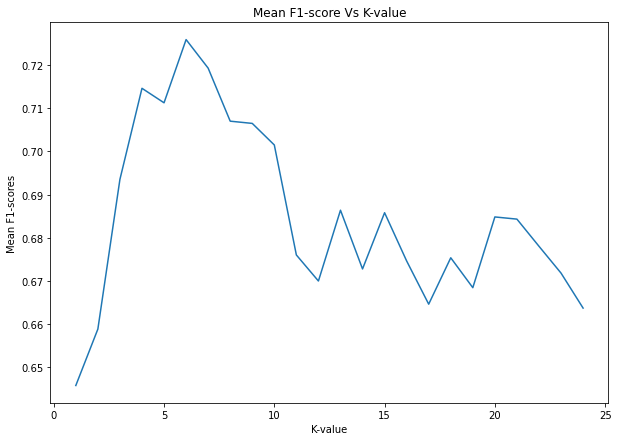

In [41]:
# Performing Cross-validation to find optimal value of k 
k_scores=[]

for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X,y, cv=10, scoring = 'f1_weighted')
    k_scores.append(scores.mean())

plt.figure(figsize=(10,7))
plt.title('Mean F1-score Vs K-value')
plt.xlabel('K-value')
plt.ylabel('Mean F1-scores')
sns.lineplot(x = range(1,25), y = k_scores);

We can see from above k=7 seems to be a good k-value

**Training the model on the entire dataset**

In [44]:
# Finally Training the KNN model on the entire training dataset i.e. loan_train.csv dataset
knn_final_model = KNeighborsClassifier(n_neighbors = 7)
knn_final_model.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

# Decision Tree


In [24]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

**Finding the optimal value for max depth using cross-validation**

In [25]:
# Using cross validation to find best depth value for the decision tree
max_depth_list= [3,4,5,6,7,10,12,15]
for depth in max_depth_list:
  decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth = depth, min_samples_split=10,min_samples_leaf=2, random_state=42)
  scores = []
  scores=cross_val_score(decision_tree, X,y, cv=10, scoring = 'f1_weighted')
  print('F1-score for depth ' + str(depth) + ':', scores.mean())

F1-score for depth 3: 0.6212522571036372
F1-score for depth 4: 0.6260226861534479
F1-score for depth 5: 0.6113926792588535
F1-score for depth 6: 0.6240642563690955
F1-score for depth 7: 0.6333704641703262
F1-score for depth 10: 0.7174597555462636
F1-score for depth 12: 0.7055011774555443
F1-score for depth 15: 0.7155844275387944


Max-Depth = 10 seems to be a good value from above results

**Training the model on the entire dataset**

In [26]:
# Finally Training the Decision Tree model on the entire training dataset i.e. loan_train.csv dataset
decision_tree_model_final_model = DecisionTreeClassifier(criterion="entropy", max_depth = 10, min_samples_split=10,min_samples_leaf=2, random_state=42)
decision_tree_model_final_model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

# Support Vector Machine


In [27]:
# import library
from sklearn import svm

**Finding the optimal kernel value using cross-validation**

In [28]:
# Using Cross Validation to find the best kernel value
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
for ker in kernel_list:
    svm_model = svm.SVC(kernel=ker,random_state=42)
    scores = []
    scores=cross_val_score(svm_model, X,y, cv=10, scoring = 'f1_weighted')
    print('F1-score for kernel ' + str(ker) + ':', scores.mean())

F1-score for kernel linear: 0.6436304357808698
F1-score for kernel poly: 0.6636390241935434
F1-score for kernel rbf: 0.6548666058866158
F1-score for kernel sigmoid: 0.6189406628609188


Kernel = 'poly' seems to be giving the best results

**Training the model on the entire dataset**

In [29]:
# Finally Training the SVM model on the entire training dataset i.e. loan_train.csv dataset
svm_final_model = svm.SVC(kernel='poly', random_state=42)
svm_final_model.fit(X, y) 

SVC(kernel='poly', random_state=42)

# Logistic Regression


In [30]:
# importing library
from sklearn.linear_model import LogisticRegression

**Finding the best combination of c and solver value using cross-validation**

In [31]:
# Using Cross Validation to find the best value for c and solver
solver_list = ['liblinear', 'sag', 'saga']
C = [0.01, 0.1, 0.001, 0.2, 0.5, 1, 10, 100]
for sol in solver_list:
  for c in C:
    lr = LogisticRegression(C=c,solver=sol,random_state=42)
    scores = []
    scores=cross_val_score(lr, X,y, cv=10, scoring = 'f1_weighted')
    print('F1-score for C ' + str(c) + ' and solver '+ sol+ ':', scores.mean())

F1-score for C 0.01 and solver liblinear: 0.6353075726031019
F1-score for C 0.1 and solver liblinear: 0.6480728779053531
F1-score for C 0.001 and solver liblinear: 0.636623745255678
F1-score for C 0.2 and solver liblinear: 0.6439118801729268
F1-score for C 0.5 and solver liblinear: 0.6512036338398264
F1-score for C 1 and solver liblinear: 0.6512036338398264
F1-score for C 10 and solver liblinear: 0.6459931921076456
F1-score for C 100 and solver liblinear: 0.6459931921076456
F1-score for C 0.01 and solver sag: 0.6450512008081921
F1-score for C 0.1 and solver sag: 0.6529760486881864
F1-score for C 0.001 and solver sag: 0.6450512008081921
F1-score for C 0.2 and solver sag: 0.6551600383255052
F1-score for C 0.5 and solver sag: 0.6457650061852365
F1-score for C 1 and solver sag: 0.651693268973136
F1-score for C 10 and solver sag: 0.6459931921076456
F1-score for C 100 and solver sag: 0.6459931921076456
F1-score for C 0.01 and solver saga: 0.6450512008081921
F1-score for C 0.1 and solver saga

C=1 and solver = 'sag' are a good choice looking at the results above

**Training the model on the entire dataset**

In [32]:
# Finally Training the LR model on the entire training dataset
lr_final_model = LogisticRegression(C=1.0,solver='sag',random_state=42)
lr_final_model.fit(X, y) 

LogisticRegression(random_state=42, solver='sag')

# Model Evaluation using Test set


First, download and load the test set:


In [33]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-10-07 20:32:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-10-07 20:32:32 (430 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [34]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


**Performing the same pre-processing steps on the testing dataset as perfomed on training dataset**

In [35]:
#Convert to date time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# Creating days of the week and weekend feature
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#Convert Categorical features to numerical values
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#Using one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

#feature set, X:
X_test_set = Feature_test

#Convert Categorical features to numerical values and creating labels, y 
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y_test_set = test_df['loan_status']

#Normalizing data
X_test_set= preprocessing.StandardScaler().fit(X_test_set).transform(X_test_set)

# Evaluating results for KNN model

In [45]:
# Final results for KNN model
y_pred = knn_final_model.predict(X_test_set)
knn_f1=f1_score(y_test_set, y_pred, average='weighted')
knn_jacc=jaccard_score(y_test_set, y_pred,pos_label=1)
print('KNN Model F1-score for the given test set: ', f1_score(y_test_set, y_pred, average='weighted'))
print('KNN Model Jaccard score for the given test: ', jaccard_score(y_test_set, y_pred,pos_label=1))

KNN Model F1-score for the given test set:  0.7001989201477693
KNN Model Jaccard score for the given test:  0.7


# Evaluating results for Decision Tree model

In [46]:
y_pred = decision_tree_model_final_model.predict(X_test_set)
dec_tree_f1=f1_score(y_test_set, y_pred, average='weighted')
dec_tree_jacc=jaccard_score(y_test_set, y_pred,pos_label=1)
print('Decision Tree Model F1-score for the given test set: : ',f1_score(y_test_set, y_pred, average='weighted'))
print('Decision Tree Model Jaccard score for the given test: ',jaccard_score(y_test_set, y_pred,pos_label=1))

Decision Tree Model F1-score for the given test set: :  0.6871008939974457
Decision Tree Model Jaccard score for the given test:  0.7058823529411765


# Evaluating results for SVM model

In [47]:
# Final results for SVM Model
y_pred = svm_final_model.predict(X_test_set)
svm_f1=f1_score(y_test_set, y_pred, average='weighted')
svm_jacc=jaccard_score(y_test_set, y_pred,pos_label=1)
print('SVM Model F1-score for the given test set: : ',f1_score(y_test_set, y_pred, average='weighted'))
print('SVM Model Jaccard score for the given test: ',jaccard_score(y_test_set, y_pred,pos_label=1))

SVM Model F1-score for the given test set: :  0.683127572016461
SVM Model Jaccard score for the given test:  0.7307692307692307


# Evaluating results for LR model

In [48]:
# Final results for LR Model
y_pred = lr_final_model.predict(X_test_set)
y_prob = lr_final_model.predict_proba(X_test_set)
lr_f1=f1_score(y_test_set, y_pred, average='weighted')
lr_jacc=jaccard_score(y_test_set, y_pred,pos_label=1)
lr_logloss=log_loss(y_test_set, y_prob)
print('LR Model F1-score for the given test set: : ',f1_score(y_test_set, y_pred, average='weighted'))
print('LR Model Jaccard score for the given test: ',jaccard_score(y_test_set, y_pred,pos_label=1))
print('LR Model Log Loss for the given test: ',log_loss(y_test_set, y_prob))

LR Model F1-score for the given test set: :  0.6717642373556352
LR Model Jaccard score for the given test:  0.7547169811320755
LR Model Log Loss for the given test:  0.48080226246308944


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


In [49]:
# Evaluation metric results displayed in tabular format
data={'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'],'Jaccard': [knn_jacc, dec_tree_jacc, svm_jacc, lr_jacc], 
      'F1-score': [knn_f1, dec_tree_f1, svm_f1, lr_f1], 'LogLoss': ['NA', 'NA', 'NA', lr_logloss]}
  
# Create DataFrame
res_df = pd.DataFrame(data)
res_df

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.700000,0.700199,NA
1,Decision Tree,0.705882,0.687101,NA
2,SVM,0.730769,0.683128,NA
3,Logistic Regression,0.754717,0.671764,0.480802


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
